<h1>Estabilization</h1>

<h2>Imports & input/output definition</h2>

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

input_1 = ctrl.Antecedent(np.arange(-0.4, 0.4, 0.05), 'input_1')
input_2 = ctrl.Antecedent(np.arange(-1, 1, 0.1), 'input_2')

input_3 = ctrl.Antecedent(np.arange(-31, 31, 0.5), 'input_3')
input_4 = ctrl.Antecedent(np.arange(-7, 7, 0.1), 'input_4')

output = ctrl.Consequent(np.arange(-7, 7, 0.1), 'output')

<h2>Graphs definition</h2>

C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvari

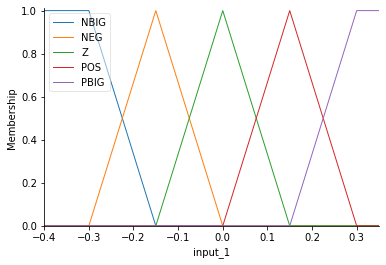

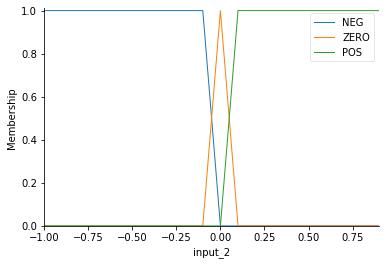

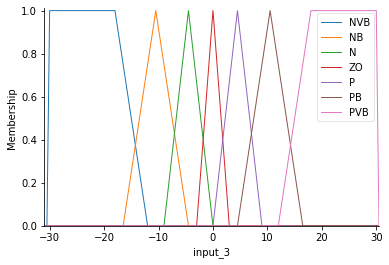

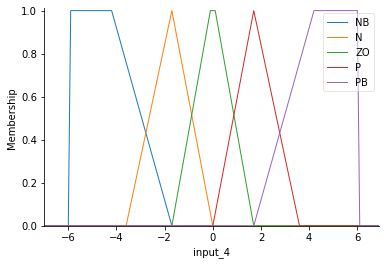

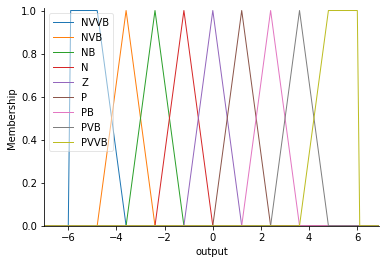

In [11]:
input_1['NBIG'] = fuzz.trapmf(input_1.universe, [-0.4, -0.4, -0.3, -0.15])
input_1['NEG'] = fuzz.trimf(input_1.universe, [-0.30, -0.15, 0])
input_1['Z'] = fuzz.trimf(input_1.universe, [-0.15, 0, 0.15])
input_1['POS'] = fuzz.trimf(input_1.universe, [0, 0.15, 0.3])
input_1['PBIG'] = fuzz.trapmf(input_1.universe, [0.15, 0.3, 0.4, 0.4])

input_2['NEG'] = fuzz.trapmf(input_2.universe, [-1, -1, -0.1, 0])
input_2['ZERO'] = fuzz.trimf(input_2.universe, [-0.1, 0, 0.1])
input_2['POS'] = fuzz.trapmf(input_2.universe, [0, 0.1, 1, 1])

input_3['NVB'] = fuzz.trapmf(input_3.universe, [-30, -30, -18, -12])
input_3['NB'] = fuzz.trimf(input_3.universe, [-16.5, -10.5, -4.5])
input_3['N'] = fuzz.trimf(input_3.universe, [-9, -4.5, 0])
input_3['ZO'] = fuzz.trapmf(input_3.universe, [-3, -0, -0, 3])
input_3['P'] = fuzz.trimf(input_3.universe, [0, 4.5, 9])
input_3['PB'] = fuzz.trimf(input_3.universe, [4.5, 10.5, 16.5])
input_3['PVB'] = fuzz.trapmf(input_3.universe, [12, 18, 30, 30])

input_4['NB'] = fuzz.trapmf(input_4.universe, [-6, -6, -4.2, -1.7])
input_4['N'] = fuzz.trimf(input_4.universe, [-3.6, -1.7, 0])
input_4['ZO'] = fuzz.trapmf(input_4.universe, [-1.7, -0.1, 0.1, 1.7])
input_4['P'] = fuzz.trimf(input_4.universe, [0, 1.7, 3.6])
input_4['PB'] = fuzz.trapmf(input_4.universe, [1.7, 4.2, 6, 6])

output['NVVB'] = fuzz.trapmf(output.universe, [-6, -6, -4.8, -3.6])
output['NVB'] = fuzz.trimf(output.universe, [-4.8, -3.6, -2.4])
output['NB'] = fuzz.trimf(output.universe, [-3.6, -2.4, -1.2])
output['N'] = fuzz.trimf(output.universe, [-2.4, -1.2, 0])
output['Z'] = fuzz.trimf(output.universe, [-1.2, 0, 1.2])
output['P'] = fuzz.trimf(output.universe, [0, 1.2, 2.4])
output['PB'] = fuzz.trimf(output.universe, [1.2, 2.4, 3.6])
output['PVB'] = fuzz.trimf(output.universe, [2.4, 3.6, 4.8])
output['PVVB'] = fuzz.trapmf(output.universe, [3.6, 4.8, 6, 6])

input_1.view()
input_2.view()
input_3.view()
input_4.view()
output.view()

<h2>Rules definition</h2>

In [12]:
rule_1 = ctrl.Rule(input_1['NBIG'] & input_2['NEG'], output['PVVB'])
rule_2 = ctrl.Rule(input_1['NEG'] & input_2['NEG'], output['PVB'])
rule_3 = ctrl.Rule(input_1['Z'] & input_2['NEG'], output['PB'])

rule_4 = ctrl.Rule(input_1['Z'] & input_2['ZERO'], output['Z'])

rule_5 = ctrl.Rule(input_1['Z'] & input_2['POS'], output['NB'])
rule_6 = ctrl.Rule(input_1['POS'] & input_2['POS'], output['NVB'])
rule_7 = ctrl.Rule(input_1['PBIG'] & input_2['POS'], output['NVVB'])

rule_8 = ctrl.Rule(input_3['NVB'] & input_4['NB'], output['NVVB'])
rule_9 = ctrl.Rule(input_3['NB'] & input_4['NB'], output['NVVB'])
rule_10 = ctrl.Rule(input_3['N'] & input_4['NB'], output['NVB'])
rule_11 = ctrl.Rule(input_3['ZO'] & input_4['NB'], output['NB'])
rule_12 = ctrl.Rule(input_3['P'] & input_4['NB'], output['N'])
rule_13 = ctrl.Rule(input_3['PB'] & input_4['NB'], output['Z'])
rule_14 = ctrl.Rule(input_3['PVB'] & input_4['NB'], output['P'])

rule_15 = ctrl.Rule(input_3['NVB'] & input_4['N'], output['NVVB'])
rule_16 = ctrl.Rule(input_3['NB'] & input_4['N'], output['NVB'])
rule_17 = ctrl.Rule(input_3['N'] & input_4['N'], output['NB'])
rule_18 = ctrl.Rule(input_3['ZO'] & input_4['N'], output['N'])
rule_19 = ctrl.Rule(input_3['P'] & input_4['N'], output['Z'])
rule_20 = ctrl.Rule(input_3['PB'] & input_4['N'], output['P'])
rule_21 = ctrl.Rule(input_3['PVB'] & input_4['N'], output['PB'])

rule_22 = ctrl.Rule(input_3['NVB'] & input_4['ZO'], output['NVB'])
rule_23 = ctrl.Rule(input_3['NB'] & input_4['ZO'], output['NB'])
rule_24 = ctrl.Rule(input_3['N'] & input_4['ZO'], output['N'])
rule_25 = ctrl.Rule(input_3['ZO'] & input_4['ZO'], output['Z'])
rule_26 = ctrl.Rule(input_3['P'] & input_4['ZO'], output['P'])
rule_27 = ctrl.Rule(input_3['PB'] & input_4['ZO'], output['PB'])
rule_28 = ctrl.Rule(input_3['PVB'] & input_4['ZO'], output['PVB'])

rule_29 = ctrl.Rule(input_3['NVB'] & input_4['P'], output['NB'])
rule_30 = ctrl.Rule(input_3['NB'] & input_4['P'], output['N'])
rule_31 = ctrl.Rule(input_3['N'] & input_4['P'], output['Z'])
rule_32 = ctrl.Rule(input_3['ZO'] & input_4['P'], output['P'])
rule_33 = ctrl.Rule(input_3['P'] & input_4['P'], output['PB'])
rule_34 = ctrl.Rule(input_3['PB'] & input_4['P'], output['PVB'])
rule_35 = ctrl.Rule(input_3['PVB'] & input_4['P'], output['PVVB'])

rule_36 = ctrl.Rule(input_3['NVB'] & input_4['PB'], output['N'])
rule_37 = ctrl.Rule(input_3['NB'] & input_4['PB'], output['Z'])
rule_38 = ctrl.Rule(input_3['N'] & input_4['PB'], output['P'])
rule_39 = ctrl.Rule(input_3['ZO'] & input_4['PB'], output['PB'])
rule_40 = ctrl.Rule(input_3['P'] & input_4['PB'], output['PVB'])
rule_41 = ctrl.Rule(input_3['PB'] & input_4['PB'], output['PVVB'])
rule_42 = ctrl.Rule(input_3['PVB'] & input_4['PB'], output['PVVB'])

controller = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9, rule_10,
                                 rule_11, rule_12, rule_13, rule_14, rule_15, rule_16, rule_17, rule_18, rule_19, rule_20,
                                 rule_21, rule_22, rule_23, rule_24, rule_25, rule_26, rule_27, rule_28, rule_29, rule_30, 
                                 rule_31, rule_32, rule_33, rule_34, rule_35, rule_36, rule_37, rule_38, rule_39, rule_40, 
                                 rule_41, rule_42])

<h2>Inputs & Compute Fuzzy</h2>

In [13]:
FuzzyStabilization = ctrl.ControlSystemSimulation(controller)

angleSim = float(input('Angle: '))
speedSim = float(input('Speed: '))
input_3Sim = int(input('input_3: '))
input_4Sim = int(input('input_4: '))
FuzzyStabilization.input['input_1'] = angleSim
FuzzyStabilization.input['input_2'] = speedSim
FuzzyStabilization.input['input_3'] = input_3Sim
FuzzyStabilization.input['input_4'] = input_4Sim
FuzzyStabilization.compute()

valorPendulo = FuzzyStabilization.output['output']

<h2>Results</h2>


Angle 0 
Speed 0 
input_3  2.00 
input_4  2.00 
output  2.12


C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mathe\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvari

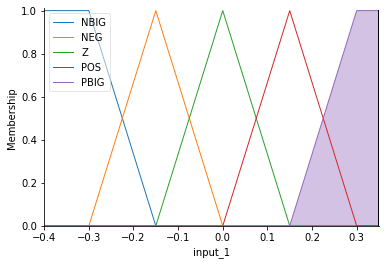

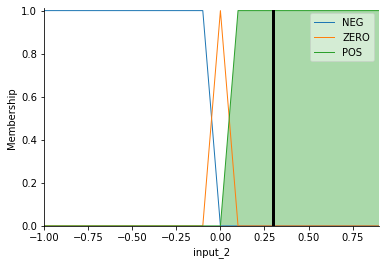

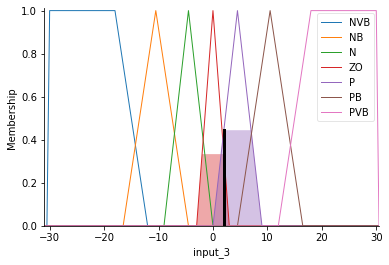

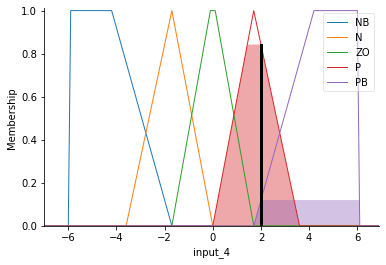

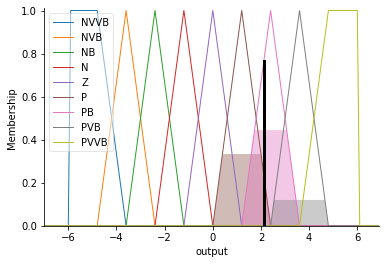

In [14]:
print("\ninput_1: %d \ninput_2: %d \ninput_3: %5.2f \ninput_4: %5.2f \noutput: %5.2f" %(
        angleSim,
        speedSim,
        input_3Sim,
        input_4Sim,
        valorPendulo))


input_1.view(sim=FuzzyStabilization)
input_2.view(sim=FuzzyStabilization)
input_3.view(sim=FuzzyStabilization)
input_4.view(sim=FuzzyStabilization)

output.view(sim=FuzzyStabilization)

plt.show()